## Holiday Sprint - Examining Legos!

**Imports**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

**Datasets to be Examined**

![image info](../data/downloads_schema.png)

[Source: Kaggle](https://www.kaggle.com/rtatman/lego-database)

**Data Read-In**

In [2]:
#reading in datasets outlined in the image above
colors_df = pd.read_csv('../data/colors.csv')
inventories_df = pd.read_csv('../data/inventories.csv')
inventory_parts_df = pd.read_csv('../data/inventory_parts.csv')
inventory_sets_df = pd.read_csv('../data/inventory_sets.csv')
part_categories_df = pd.read_csv('../data/part_categories.csv')
parts_df = pd.read_csv('../data/parts.csv')
sets_df = pd.read_csv('../data/sets.csv')
themes_df = pd.read_csv('../data/themes.csv')

**Examining colors.csv**

In [3]:
colors_df.head()
#note, 'name' unknown 'rgb' 0033B2 is https://www.color-hex.com/color/0033b2 (Klein Blue)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
f'The "colors_df" is {colors_df.shape}, rows by columns.'

'The "colors_df" is (135, 4), rows by columns.'

In [5]:
colors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        135 non-null    int64 
 1   name      135 non-null    object
 2   rgb       135 non-null    object
 3   is_trans  135 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


In [8]:
colors_df['name'].values

array(['Unknown', 'Black', 'Blue', 'Green', 'Dark Turquoise', 'Red',
       'Dark Pink', 'Brown', 'Light Gray', 'Dark Gray', 'Light Blue',
       'Bright Green', 'Light Turquoise', 'Salmon', 'Pink', 'Yellow',
       'White', 'Light Green', 'Light Yellow', 'Tan', 'Light Violet',
       'Glow In Dark Opaque', 'Purple', 'Dark Blue-Violet', 'Orange',
       'Magenta', 'Lime', 'Dark Tan', 'Bright Pink', 'Medium Lavender',
       'Lavender', 'Trans-Black IR Lens', 'Trans-Dark Blue',
       'Trans-Green', 'Trans-Bright Green', 'Trans-Red', 'Trans-Black',
       'Trans-Light Blue', 'Trans-Neon Green', 'Trans-Very Lt Blue',
       'Trans-Dark Pink', 'Trans-Yellow', 'Trans-Clear', 'Trans-Purple',
       'Trans-Neon Yellow', 'Trans-Neon Orange', 'Chrome Antique Brass',
       'Chrome Blue', 'Chrome Green', 'Chrome Pink', 'Chrome Black',
       'Very Light Orange', 'Light Purple', 'Reddish Brown',
       'Light Bluish Gray', 'Dark Bluish Gray', 'Medium Blue',
       'Medium Green', 'Speckle Black-

In [9]:
colors_df[colors_df['name'] == '[No Color]']

#note, 'name' [No Color] 'rgb' 05131D is https://www.color-hex.com/color/05131d (not named)
#it's like a very dark blueish-black

,id,name,rgb,is_trans
134,9999,[No Color],05131D,f


In [6]:
colors_df['is_trans'].value_counts(normalize = True)
#approximately 80% of lego blocks are opaque, 20% are translucent/transparent
#might be a good feature to model for

f    0.792593
t    0.207407
Name: is_trans, dtype: float64

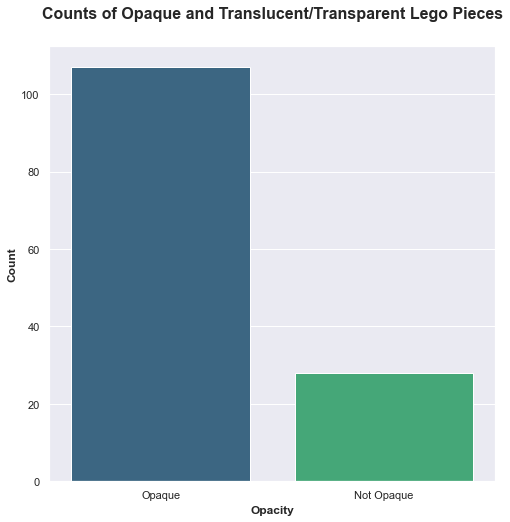

In [8]:
plt.figure(figsize = (8, 8))

sns.countplot(x = 'is_trans', data = colors_df, palette = 'viridis')

plt.title('Counts of Opaque and Translucent/Transparent Lego Pieces',
          fontsize = 16, fontweight = 'bold', y = 1.05)
plt.xticks(ticks = [0, 1], 
           labels = ['Opaque', 'Not Opaque'])
plt.xlabel('Opacity',
           fontweight = 'bold')
plt.ylabel('Count',
           fontweight = 'bold');

**Examining inventories.csv**

In [8]:
inventories_df.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [9]:
f'The "inventories_df" is {inventories_df.shape}, rows by columns.'

'The "inventories_df" is (11681, 3), rows by columns.'

In [10]:
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


In [9]:
inventories_df['id'].nunique()

11681

In [10]:
inventories_df['version'].nunique()

5

In [11]:
inventories_df['set_num'].nunique()

11670

In [11]:
inventories_df['version'].value_counts()

1    11669
2        9
3        1
4        1
5        1
Name: version, dtype: int64

In [12]:
inventories_df['version'].value_counts(normalize = True)

1    0.998973
2    0.000770
3    0.000086
4    0.000086
5    0.000086
Name: version, dtype: float64

In [12]:
inventories_df[inventories_df['version'] != 1].sort_values(by = 'version')
#instances where version is something other than 1

,id,version,set_num
11438,16490,2,6515-1
11479,16760,2,11905-1
11495,16878,2,8030-1
11580,17793,2,76081-1
11581,17799,2,214.6-1
11585,17848,2,421-2
11625,18221,2,8880-1
11626,18231,2,31015-1
11628,18274,2,75053-1
11586,17849,3,421-2


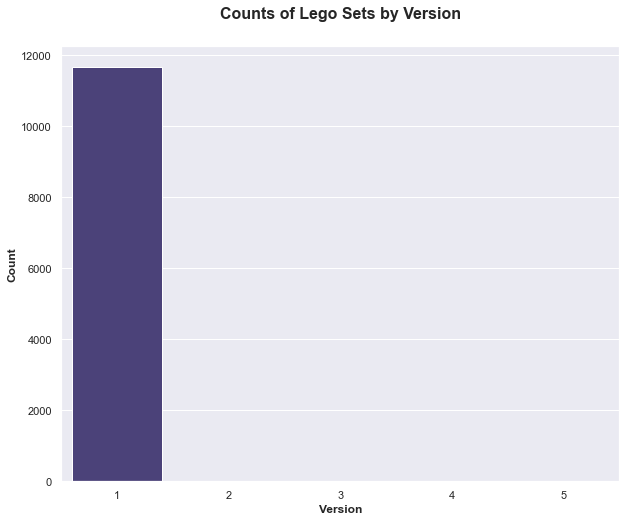

In [14]:
plt.figure(figsize = (10, 8))

sns.countplot(x = 'version', data = inventories_df, palette = 'viridis')

plt.title('Counts of Lego Sets by Version',
          fontsize = 16, fontweight = 'bold', y = 1.05)
plt.xlabel('Version',
           fontweight = 'bold')
plt.ylabel('Count',
           fontweight = 'bold');
#version '1' is overwhelming the majority class, 
#the other are almost negligible when compared to it

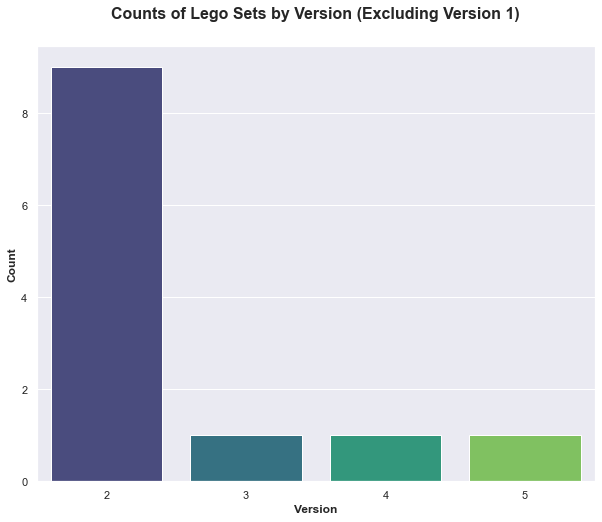

In [13]:
plt.figure(figsize = (10, 8))

sns.countplot(x = 'version',
              data = inventories_df[inventories_df['version'] != 1],
              palette = 'viridis')

plt.title('Counts of Lego Sets by Version (Excluding Version 1)',
          fontsize = 16, fontweight = 'bold', y = 1.05)
plt.xlabel('Version',
           fontweight = 'bold')
plt.ylabel('Count',
           fontweight = 'bold');
#excluding version '1', version '2' is the majority class

**Examining inventory_parts.csv**

In [17]:
inventory_parts_df.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [18]:
f'The "inventory_parts_df" is {inventory_parts_df.shape}, rows by columns.'

'The "inventory_parts_df" is (580251, 5), rows by columns.'

In [19]:
inventory_parts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
dtypes: int64(3), object(2)
memory usage: 22.1+ MB


In [20]:
inventory_parts_df['inventory_id'].nunique()

10724

In [21]:
inventory_parts_df['part_num'].nunique()

23131

In [22]:
inventory_parts_df['color_id'].nunique()

131

In [23]:
inventory_parts_df['quantity'].nunique()

239

In [24]:
inventory_parts_df['is_spare'].nunique()

2

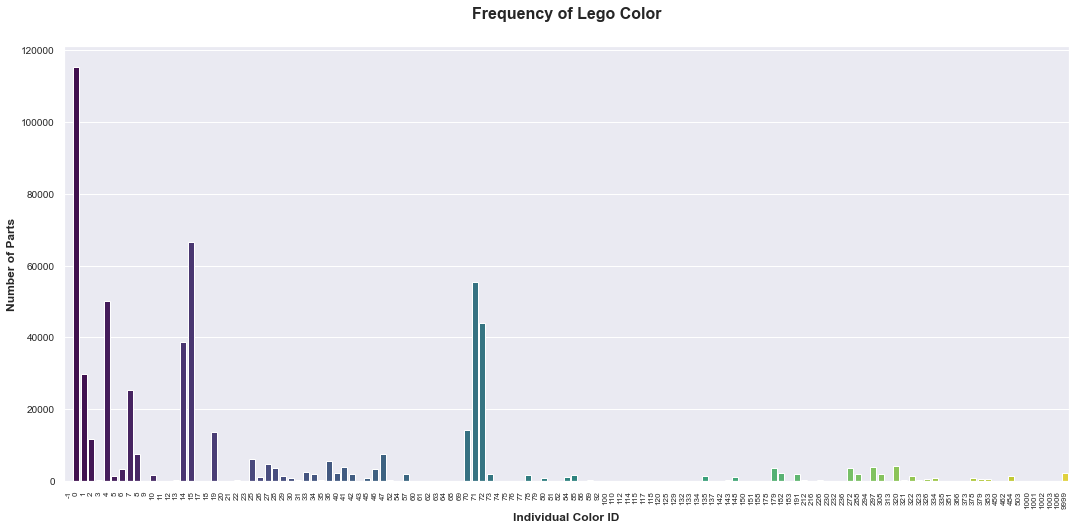

In [18]:
plt.figure(figsize = (18, 8))

sns.countplot(x = 'color_id', data = inventory_parts_df, palette = 'viridis')

plt.title('Frequency of Lego Color',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.05)

plt.xticks(fontsize = 8,
           rotation = 90)
plt.xlabel('Individual Color ID',
           fontweight = 'bold')

plt.yticks(fontsize = 10,
           rotation = 0)
plt.ylabel('Number of Legos',
           fontweight = 'bold');

In [26]:
#top 10 most represented colors

inventory_parts_df['color_id'].value_counts()[0:10]
#inventory_parts_df['color_id'].value_counts()[0:10].index

0     115176
15     66549
71     55317
4      50217
72     43913
14     38837
1      29857
7      25339
70     14168
19     13681
Name: color_id, dtype: int64

In [17]:
colors_df[colors_df['id'].isin([0, 15, 71, 4, 72, 14, 1, 7, 70, 19])][['name']]
#names of the top 10 most represented colors

,name
1,Black
2,Blue
5,Red
8,Light Gray
15,Yellow
16,White
19,Tan
53,Reddish Brown
54,Light Bluish Gray
55,Dark Bluish Gray


In [20]:
#preparing data for plot which excludes the top 10 most frequent/popular colors:
inventory_parts_df[-inventory_parts_df['color_id'].isin([0, 15, 71, 4, 72, 14, 1, 7, 70, 19])].head()

,inventory_id,part_num,color_id,quantity,is_spare
2,1,mcsport6,25,1,f
4,3,11816pr0005,78,1,f
5,3,2343,47,1,f
6,3,3003,29,1,f
7,3,30176,2,1,f


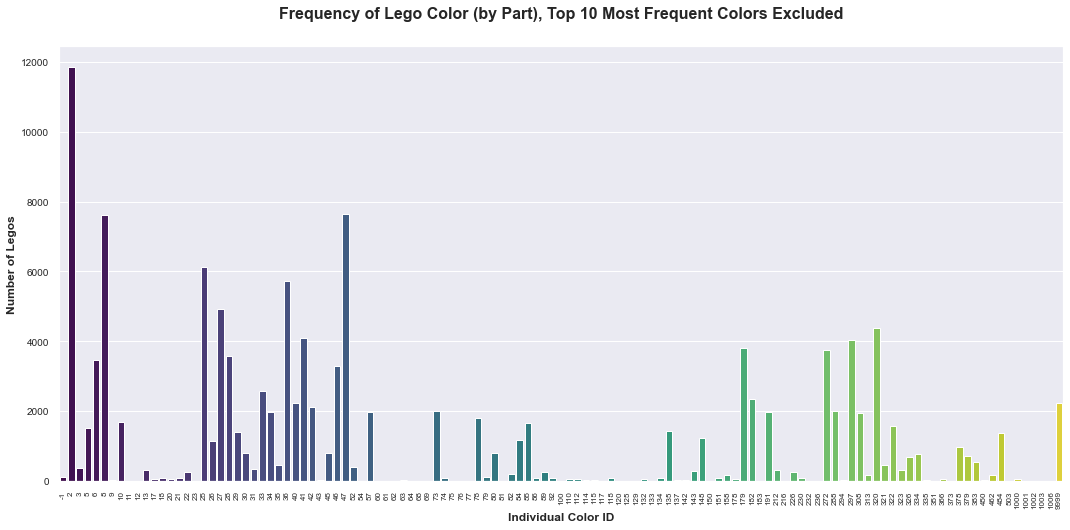

In [22]:
plt.figure(figsize = (18, 8))

sns.countplot(x = 'color_id',
              data = inventory_parts_df[-inventory_parts_df['color_id'].isin([0, 15, 71, 4, 72, 14, 1, 7, 70, 19])],
              palette = 'viridis')

plt.title('Frequency of Lego Color (by Part), Top 10 Most Frequent Colors Excluded',
          fontsize = 16, fontweight = 'bold', y = 1.05)

plt.xticks(fontsize = 8,
           rotation = 90)
plt.xlabel('Individual Color ID',
           fontweight = 'bold')

plt.yticks(fontsize = 10,
           rotation = 0)
plt.ylabel('Number of Legos',
           fontweight = 'bold');

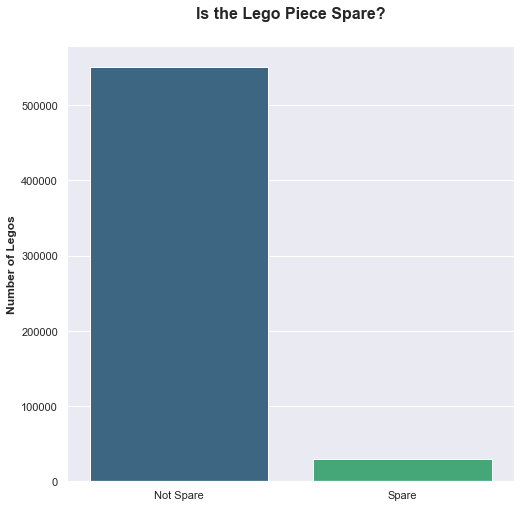

In [24]:
plt.figure(figsize = (8, 8))

sns.countplot(x = 'is_spare', 
              data = inventory_parts_df,
              palette = 'viridis')

plt.title('Is the Lego Piece Spare?',
          fontsize = 16, 
          fontweight = 'bold', y = 1.05)

plt.xticks(ticks = [0, 1], 
           labels = ['Not Spare', 'Spare'])
plt.xlabel(None)

plt.ylabel('Number of Legos',
           fontweight = 'bold');

**Examining inventory_sets.csv**

In [30]:
inventory_sets_df.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [31]:
f'The "inventory_sets_df" is {inventory_sets_df.shape}, rows by columns.'

'The "inventory_sets_df" is (2846, 3), rows by columns.'

In [32]:
inventory_sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  2846 non-null   int64 
 1   set_num       2846 non-null   object
 2   quantity      2846 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.8+ KB


In [25]:
inventory_sets_df['inventory_id'].nunique()

589

In [26]:
inventory_sets_df['set_num'].nunique()

2306

In [27]:
inventory_sets_df['quantity'].nunique()

7

In [30]:
inventory_sets_df['inventory_id'].value_counts().sort_values(ascending = False)

2514     30
7363     24
10770    24
6702     24
9926     24
         ..
11418     1
7201      1
3392      1
7209      1
10235     1
Name: inventory_id, Length: 589, dtype: int64

In [31]:
inventory_sets_df['set_num'].value_counts().sort_values(ascending = False)

7241-1      12
7942-1      11
3742-1      11
3741-1      11
7741-1      11
            ..
7575-17      1
60063-10     1
8831-0       1
4099-1       1
1280-1       1
Name: set_num, Length: 2306, dtype: int64

In [29]:
inventory_sets_df['quantity'].value_counts().sort_index()

1     2793
2       28
3        5
5        1
7        1
20       1
60      17
Name: quantity, dtype: int64

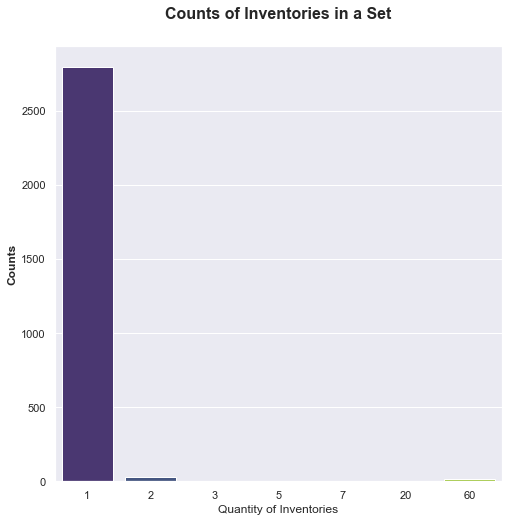

In [34]:
plt.figure(figsize = (8, 8))

sns.countplot(x = 'quantity', 
              data = inventory_sets_df,
              palette = 'viridis')

plt.title('Counts of Inventories in a Set',
          fontsize = 16, 
          fontweight = 'bold', y = 1.05)

plt.xlabel('Quantity of Inventories')

plt.ylabel('Counts',
           fontweight = 'bold');

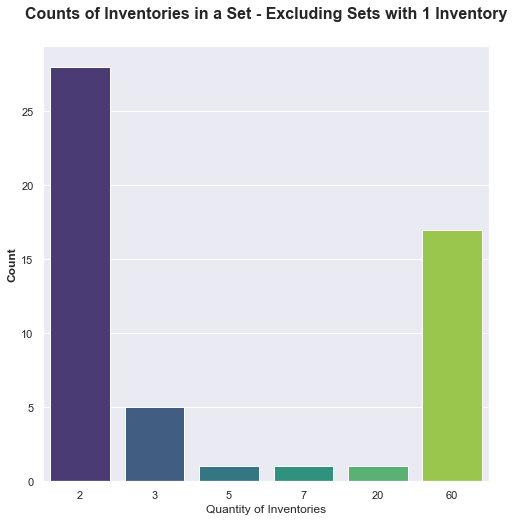

In [38]:
plt.figure(figsize = (8, 8))

sns.countplot(x = 'quantity', 
              data = inventory_sets_df[inventory_sets_df['quantity'] != 1],
              palette = 'viridis')

plt.title('Counts of Inventories in a Set - Excluding Sets with 1 Inventory',
          fontsize = 16, 
          fontweight = 'bold', y = 1.05)

plt.xlabel('Quantity of Inventories')

plt.ylabel('Count',
           fontweight = 'bold');

**Examining part_categories.csv**

In [36]:
part_categories_df.head()

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [38]:
f'The "part_categories_df" is {part_categories_df.shape}, rows by columns.'

'The "part_categories_df" is (57, 2), rows by columns.'

In [39]:
part_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      57 non-null     int64 
 1   name    57 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [29]:
part_categories_df['name'].values

array(['Baseplates', 'Bricks Printed', 'Bricks Sloped',
       'Duplo, Quatro and Primo', 'Bricks Special', 'Bricks Wedged',
       'Containers', 'Technic Bricks', 'Plates Special', 'Tiles Printed',
       'Bricks', 'Technic Connectors', 'Minifigs', 'Plates',
       'Tiles Special', 'Windows and Doors', 'Non-LEGO',
       'Hinges, Arms and Turntables', 'Tiles', 'Bricks Round and Cones',
       'Plates Round and Dishes', 'Pneumatics', 'Panels', 'Other',
       'Technic Steering, Suspension and Engine', 'Technic Special',
       'Minifig Accessories', 'Plants and Animals', 'Wheels and Tyres',
       'Tubes and Hoses', 'String, Bands and Reels',
       'Bars, Ladders and Fences', 'Rock', 'Supports, Girders and Cranes',
       'Transportation - Sea and Air', 'Transportation - Land',
       'Bricks Curved', 'Flags, Signs, Plastics and Cloth',
       'Magnets and Holders', 'Technic Panels',
       'Bionicle, Hero Factory and Constraction',
       'Belville, Scala and Fabuland', 'Znap', 'Mech

**Examining parts.csv**

In [40]:
parts_df.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [42]:
f'The "parts_df" is {parts_df.shape}, rows by columns.'

'The "parts_df" is (25993, 3), rows by columns.'

In [43]:
parts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25993 entries, 0 to 25992
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   part_num     25993 non-null  object
 1   name         25993 non-null  object
 2   part_cat_id  25993 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 609.3+ KB


In [41]:
parts_df['part_num'].nunique()

25993

In [39]:
parts_df['name'].nunique()

25779

In [40]:
parts_df['part_cat_id'].nunique()

57

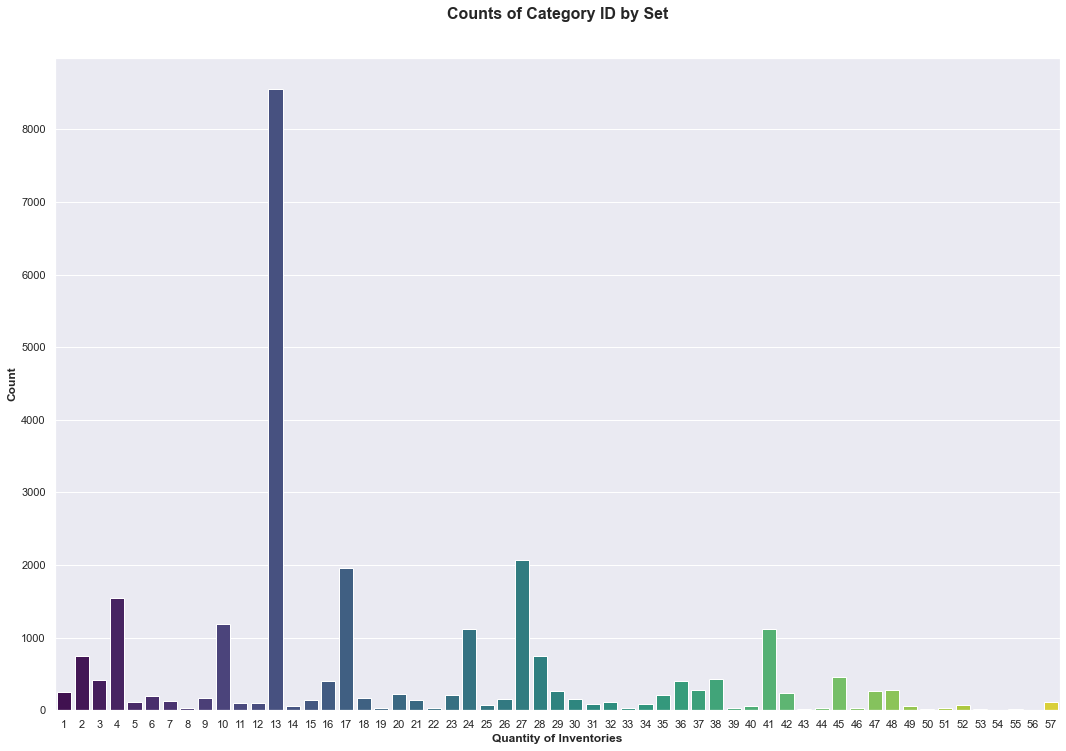

In [52]:
plt.figure(figsize = (18, 12))

sns.countplot(x = 'part_cat_id', 
              data = parts_df,
              palette = 'viridis')

plt.title('Counts of Category ID by Part',
          fontsize = 16, 
          fontweight = 'bold', y = 1.05)

plt.xlabel('Quantity of Inventories',
           fontweight = 'bold')

plt.ylabel('Count',
           fontweight = 'bold');

In [53]:
parts_df[parts_df['part_cat_id'] == 13]
#13 appears to represent the category 'minifig'

,part_num,name,part_cat_id
13,10048,Minifig Hair Tousled,13
28,10057,Body / Head Gollum,13
29,10057pr0001,Body / Head Gollum - Wide Eyes,13
30,10057pr0002,Body / Head Gollum - Narrow Eyes,13
31,10058,"Arm, Bent [Gollum]",13
...,...,...,...
25884,x581c08,Fabuland Figure Bulldog 8 2h,13
25887,x588c04,Fabuland Figure Elephant 4 with Black Eyes,13
25889,x592c04,Fabuland Figure Horse 4 6d,13
25892,x599c04,Fabuland Figure Pig 4 11d,13


In [49]:
parts_df['name'].value_counts()[0:10]

Minifig                                                          38
Minifig - Jack Stone                                             18
Minifig Head Modified Wookiee [Plain]                             4
Minifig - 4 Juniors                                               4
Plate 8 x 8                                                       3
Minifig Head Standard Grin Print [Blocked Open Stud]              3
Duplo Figure Child with Black Pigtails(Braids)                    3
Duplo Bear Adult New Style                                        3
Duplo Brick 2 x 3 with Curved Top and Eye Print on Both Sides     3
Minifig Ninjago Wrap with Silver 3 Point Emblem Print             3
Name: name, dtype: int64

In [44]:
#creating a sorted list of parts by value_count (frequency)
parts_index = parts_df['part_cat_id'].value_counts().index
parts_index

Int64Index([13, 27, 17,  4, 10, 24, 41,  2, 28, 45, 38,  3, 36, 16, 48, 37, 29,
            47,  1, 42, 20, 35, 23,  6,  9, 18, 26, 30, 21, 15,  7,  5, 32, 57,
            11, 12, 31, 34, 25, 52, 14, 49, 40, 39, 33, 51, 19, 44, 46, 22,  8,
            50, 55, 43, 53, 54, 56],
           dtype='int64')

In [45]:
#creating sorted index for mapping
sorter_index = dict(zip(parts_index, range(len(parts_index))))
#sorter_index

In [46]:
#sorted part_categories_df by the frequency of part_cat_id
part_categories_df['parts_rank'] = part_categories_df['id'].map(sorter_index)
part_categories_df.sort_values('parts_rank').head(5)

,id,name,parts_rank
12,13,Minifigs,0
26,27,Minifig Accessories,1
16,17,Non-LEGO,2
3,4,"Duplo, Quatro and Primo",3
9,10,Tiles Printed,4


In [47]:
part_categories_df.sort_values('parts_rank').tail(5)

,id,name,parts_rank
54,55,Technic Beams Special,52
42,43,Znap,53
52,53,Technic Pins,54
53,54,Technic Bushes,55
55,56,Tools,56


**Examining sets.csv**

In [48]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [49]:
f'The "sets_df" is {sets_df.shape}, rows by columns.'

'The "sets_df" is (11673, 5), rows by columns.'

In [50]:
sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


In [51]:
sets_df.sort_values('year')

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7
...,...,...,...,...,...
7287,70900-1,The Joker Balloon Escape,2017,484,123
5746,60145-1,Buggy,2017,63,80
5747,60146-1,Stunt Truck,2017,52,90
7294,70905-1,The Batmobile,2017,484,580


In [60]:
#looking at an set_num 7922-1, which appears frequently in subsequent notebooks
sets_df[sets_df['set_num'] == '7922-1']

,set_num,name,year,theme_id,num_parts
8896,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4


In [52]:
#number of sets produced per year:
sets_df['year'].value_counts().sort_index()

1950      7
1953      4
1954     14
1955     28
1956     12
       ... 
2013    593
2014    713
2015    665
2016    596
2017    296
Name: year, Length: 66, dtype: int64

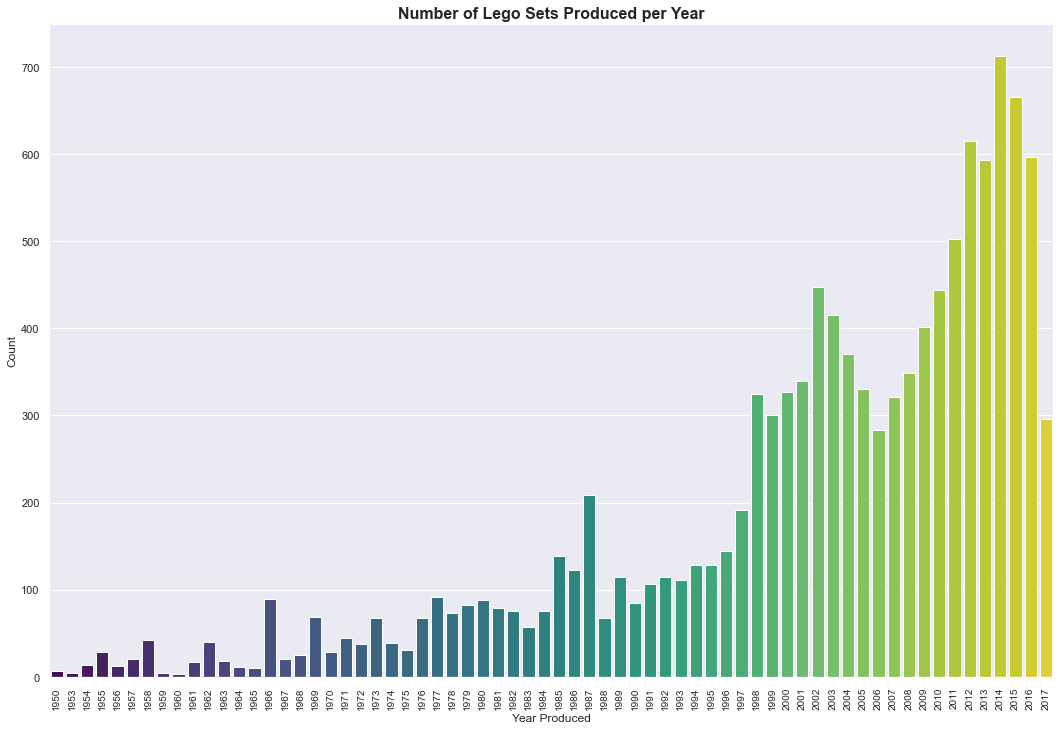

In [37]:
plt.figure(figsize = (18, 12))

sns.countplot(x = 'year',
              data = sets_df,
              palette = 'viridis')

plt.title('Number of Lego Sets Produced per Year',
          fontsize = 16,
          fontweight = 'bold')

plt.xlabel('Year Produced')
plt.xticks(fontsize = 10,
           rotation = 90)

plt.ylabel('Count');
#no sets were manufactured in 1951 or 1952

In [54]:
avg_parts_year = sets_df.groupby('year')['num_parts'].mean()
avg_parts_year

year
1950     10.142857
1953     16.500000
1954     12.357143
1955     36.857143
1956     18.500000
           ...    
2013    181.344013
2014    169.715288
2015    201.669173
2016    253.077181
2017    260.820946
Name: num_parts, Length: 66, dtype: float64

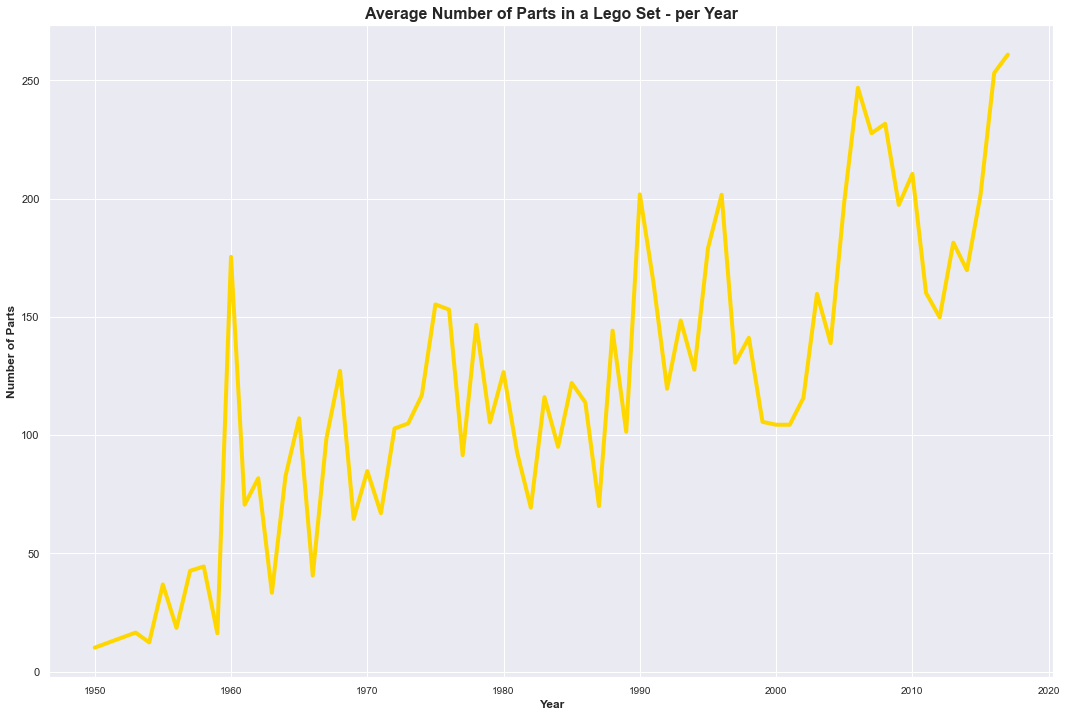

In [40]:
#array of average number of set parts per year: 
avg_parts_year = sets_df.groupby('year')['num_parts'].mean()

#plotting:

plt.figure(figsize = (18, 12))

avg_parts_year.plot(color = 'gold',
                    linewidth = 4)

plt.title('Average Number of Parts in a Lego Set - per Year',
          fontsize = 16,
          fontweight = 'bold')

plt.xlabel('Year',
           fontweight = 'bold')
plt.xticks(fontsize = 10)
plt.ylabel('Number of Parts',
           fontweight = 'bold');

In [43]:
set_years = sorted(sets_df['year'].unique())
set_years[0:10]

#note, years 1951, 1952 no sets were produced,
#going to check the set of years for missing elements in sequence

[1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961]

In [59]:
#https://stackoverflow.com/questions/16974047/efficient-way-to-find-missing-elements-in-an-integer-sequence
def missing_elements(L):
    start, end = L[0], L[-1]
    return sorted(set(range(start, end + 1)).difference(L))

In [60]:
missing_elements(set_years)
#confirming that 1951 and 1952 were the only years sets were not made.

[1951, 1952]

In [61]:
sets_df[sets_df['year'] == 1950]

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6954,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950,366,24
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6958,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7


In [41]:
avg_parts_year_by_theme = sets_df.groupby(['year', 'theme_id'])['num_parts'].mean()
avg_parts_year_by_theme

year  theme_id
1950  366          24.000000
      371           7.833333
1953  371          16.500000
1954  371           6.083333
      372          50.000000
                     ...    
2017  605         167.947368
      610         111.250000
      611          12.888889
      612         115.000000
      614         400.500000
Name: num_parts, Length: 2492, dtype: float64

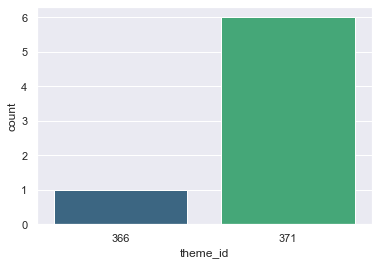

In [64]:
#sample attempt:
sns.countplot(x = 'theme_id', 
              data = sets_df[sets_df['year'] == 1950],
              palette = 'viridis');

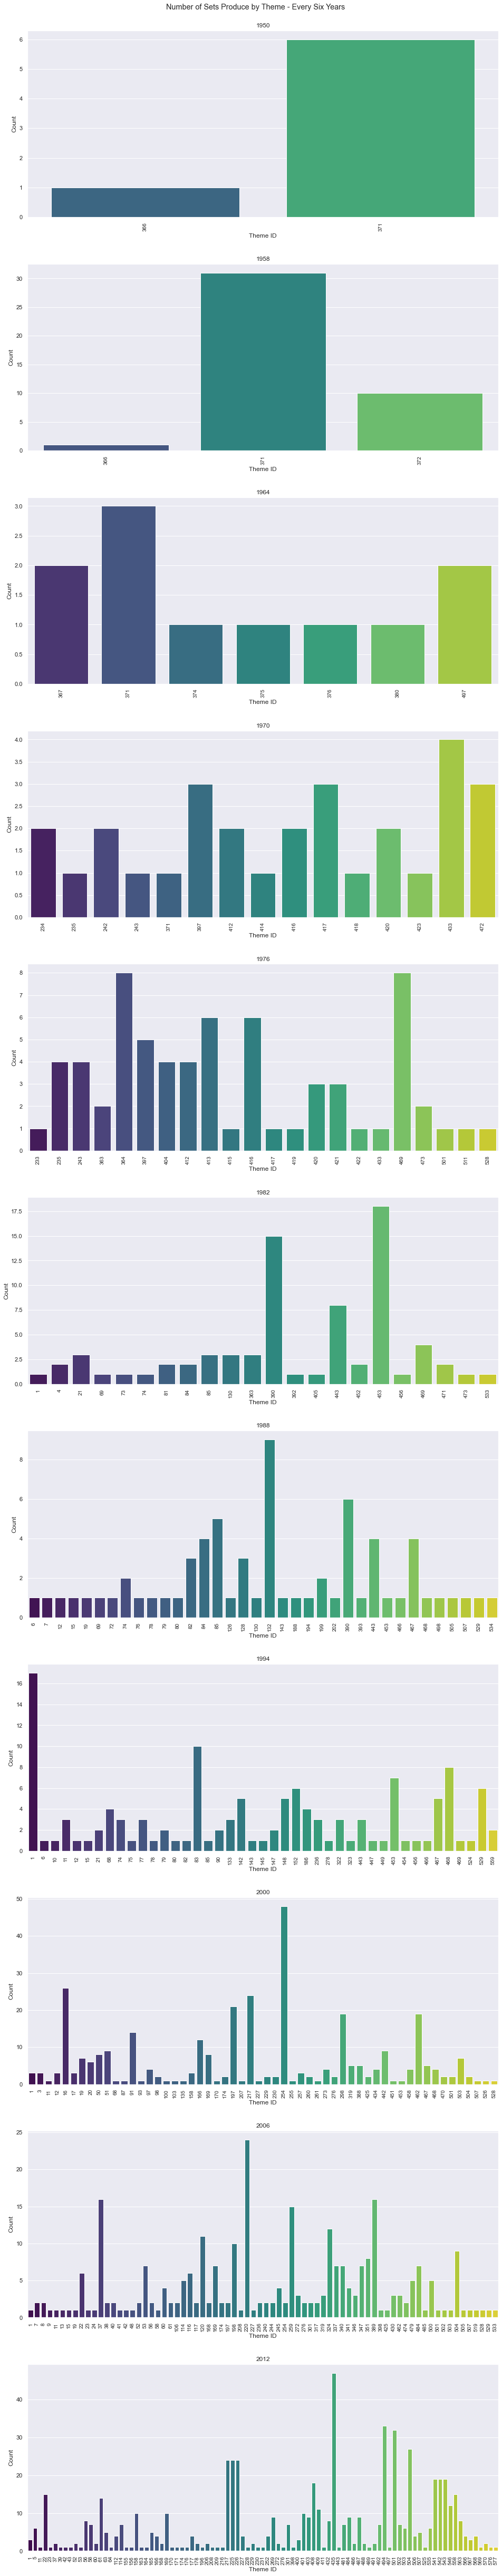

In [54]:
fig, axs = plt.subplots(11, figsize = (16, 88))

plt.subplots_adjust(hspace = 0.25)

#NEED TO SET TITLE #NEED TO SET TITLE #NEED TO SET TITLE 
#NEED TO SET TITLE #NEED TO SET TITLE #NEED TO SET TITLE 
#NEED TO SET TITLE #NEED TO SET TITLE #NEED TO SET TITLE 

plt.suptitle('Number of Sets Produce by Theme - Every Six Years', y = .888)

for year in set_years[0:66:6]:
    
    #plotting:
    sns.countplot(x = 'theme_id', 
                  data = sets_df[sets_df['year'] == year],
                  palette = 'viridis',
                  ax = axs[set_years[0:66:6].index(year)]).set(title = year,
                                                              xlabel = 'Theme ID',
                                                              ylabel = 'Count')
    
    #setting the xticks in subplots
    for label in axs[0].get_xmajorticklabels() + \
                axs[1].get_xmajorticklabels() +\
                axs[2].get_xmajorticklabels() +\
                axs[3].get_xmajorticklabels() +\
                axs[4].get_xmajorticklabels() +\
                axs[5].get_xmajorticklabels() +\
                axs[6].get_xmajorticklabels() +\
                axs[7].get_xmajorticklabels() +\
                axs[8].get_xmajorticklabels() +\
                axs[9].get_xmajorticklabels() +\
                axs[10].get_xmajorticklabels():
        label.set_fontsize(10)
        label.set_rotation(90)
        label.set_horizontalalignment("center")
    
    plt.show;

**Examining themes.csv**

In [66]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [67]:
f'The "themes_df" is {themes_df.shape}, rows by columns.'

'The "themes_df" is (614, 3), rows by columns.'

In [68]:
themes_df.info()
#note, need to change parent_id dtype to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         614 non-null    int64  
 1   name       614 non-null    object 
 2   parent_id  503 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ KB


In [54]:
themes_df['id'].nunique()

614

In [70]:
themes_df['name'].nunique()

402

In [55]:
themes_df['parent_id'].nunique()

78

In [69]:
themes_df[themes_df['parent_id'].isna()]

#how to address NaN? Change to zero?

,id,name,parent_id
0,1,Technic,NaN
21,22,Creator,NaN
49,50,Town,NaN
111,112,Racers,NaN
125,126,Space,NaN
...,...,...,...
604,605,Nexo Knights,NaN
605,606,Angry Birds,NaN
606,607,Ghostbusters,NaN
607,608,Disney,NaN


In [56]:
themes_df['name'].value_counts()[0:20]

Supplemental    18
Fire            12
Airport         11
Traffic          9
Harbor           9
Castle           8
Construction     8
Police           8
Star Wars        6
Train            6
Cargo            6
Technic          6
Creator          6
Building         6
Pirates          6
Hospital         5
Coast Guard      5
Race             5
Gas Station      4
Farm             4
Name: name, dtype: int64

Text(0, 0.5, 'Count')

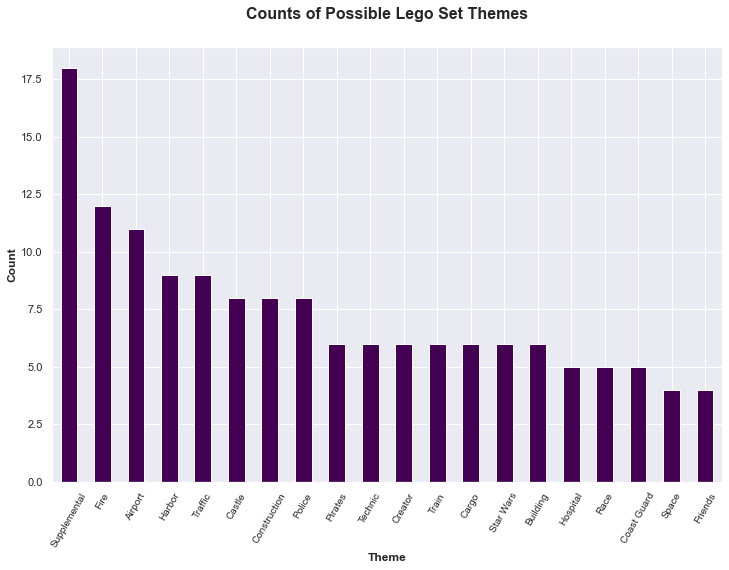

In [73]:
plt.figure(figsize = ((12, 8)))

themes_df['name'].value_counts()[0:20].plot(kind = 'bar', cmap = 'viridis'),

plt.title('Counts of Possible Lego Set Themes', 
          fontsize = 16,
          fontweight = 'bold',
          y = 1.05)

plt.xlabel('Theme',
           fontweight = 'bold')
plt.xticks(rotation = 60,
           fontsize = 10)

plt.ylabel('Count',
           fontweight = 'bold')

In [109]:
themes_df[themes_df['name'] == 'Supplemental']

,id,name,parent_id
18,19,Supplemental,1.0
47,48,Supplemental,22.0
61,62,Supplemental,52.0
83,84,Supplemental,67.0
101,102,Supplemental,94.0
118,119,Supplemental,112.0
123,124,Supplemental,123.0
142,143,Supplemental,126.0
201,202,Supplemental,186.0
240,241,Supplemental,233.0


In [57]:
unique_themes = themes_df['name'].unique()

#observing every 6th unique theme
unique_themes[0::6]

array(['Technic', 'Construction', 'Riding Cycle', 'Supplemental', 'Train',
       'Recreation', 'Hospital', 'Divers', 'Space Port', 'Drome Racers',
       'Tiny Turbos', 'Alien Conquest', 'Ice Planet 2002',
       'Space Police I', 'Galaxy Squad', 'Islanders',
       'Star Wars Clone Wars', 'Ultimate Collector Series',
       'Star Wars Rebels', 'Classic Castle', 'Fright Knights',
       'Royal Knights', 'Classic Basic', 'Halloween', 'My Own Train',
       'Prisoner of Azkaban', 'NXT', 'Last Crusade',
       'SpongeBob SquarePants', 'Model Team', 'Desert', 'Ultra Agents',
       'Aquaraiders I', 'Avatar', 'Barraki', 'Glatorian Legends',
       'Mistika', 'Rahkshi', 'Toa Inika', 'Vahki', 'Boat',
       'Wooden Box Set', 'Exo-Force', 'Heroes', 'Island Xtreme Stunts',
       'Legoland Parks', 'Airjitzu', 'Rock Raiders', 'Gravity Games',
       'Ferries', 'Znap', 'Avengers', 'Jungle Rescue', 'Duplo',
       'Soft Bricks', 'Series 3 Minifigures', 'Series 9 Minifigures',
       'The Simpsons

In [72]:
#looking at the themes of the sets produced during the first recorded year:
themes_df[themes_df['id'] == 371]

,id,name,parent_id
370,371,Supplemental,365.0


In [73]:
#looking at the themes of the sets produced during the first recorded year:
themes_df[themes_df['id'] == 366]

,id,name,parent_id
365,366,Basic Set,365.0


In [74]:
#looking at the parent theme of the sets produced during the first recorded year:
themes_df[themes_df['id'] == 365]

,id,name,parent_id
364,365,Classic,NaN
